In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

rc('text', usetex=False)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

In [20]:
res = pd.read_csv('../data/master_table.tsv', sep='\t', index_col=0)
res.rename(columns={'logq-pqm1': 'neglogq-pqm1'}, inplace=True)
cat_type = pd.CategoricalDtype(categories=['I', 'II', 'III', 'IV', 'V', 'X'], ordered=True)
res['chromosome'] = res.chromosome.astype(cat_type)

cat_type = pd.CategoricalDtype(categories=['Not DE in pqm-1', 'DE in pqm-1', 'DE in all'], ordered=True)
res['Significance-pqm1'] = res['Significance-pqm1'].astype(cat_type)
res.sort_values(['Significance-pqm1', 'padj-50'], inplace=True)

In [21]:
(res['padj-pqm1'] < 0.05).sum()

8835

/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='log2FoldChange-pqm1', ylabel='neglogq-pqm1'>

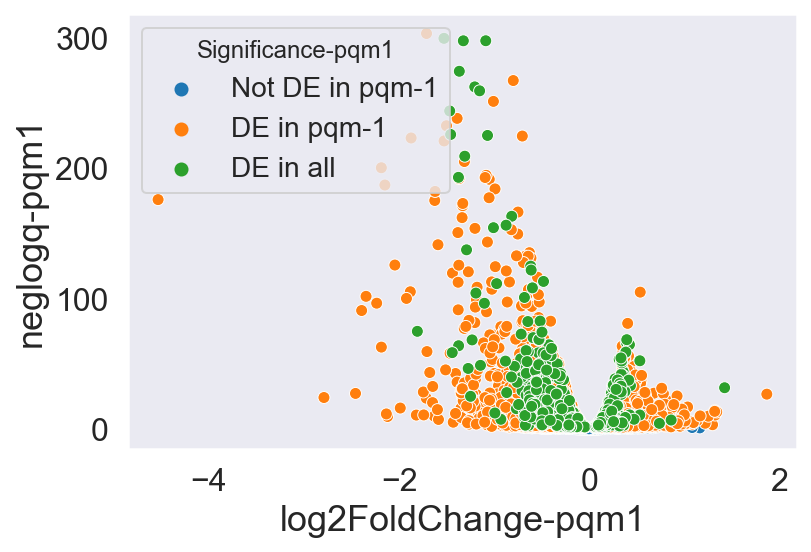

In [22]:
sns.scatterplot('log2FoldChange-pqm1', 'neglogq-pqm1', hue='Significance-pqm1', data=res)

/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='log2FoldChange-50', ylabel='log2FoldChange-pqm1'>

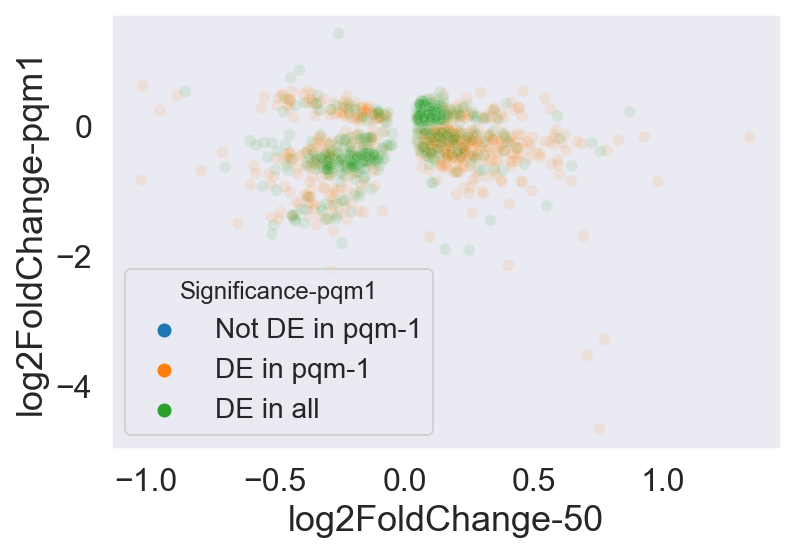

In [27]:
sns.scatterplot('log2FoldChange-50', 'log2FoldChange-pqm1', hue='Significance-pqm1',
                data=res[(res['padj-50'] < 0.05) & (res['padj-pqm1'] < 0.05 )], alpha=0.1)#, palette=["black", 'red'])i

/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='log2FoldChange-50', ylabel='log2FoldChange-58'>

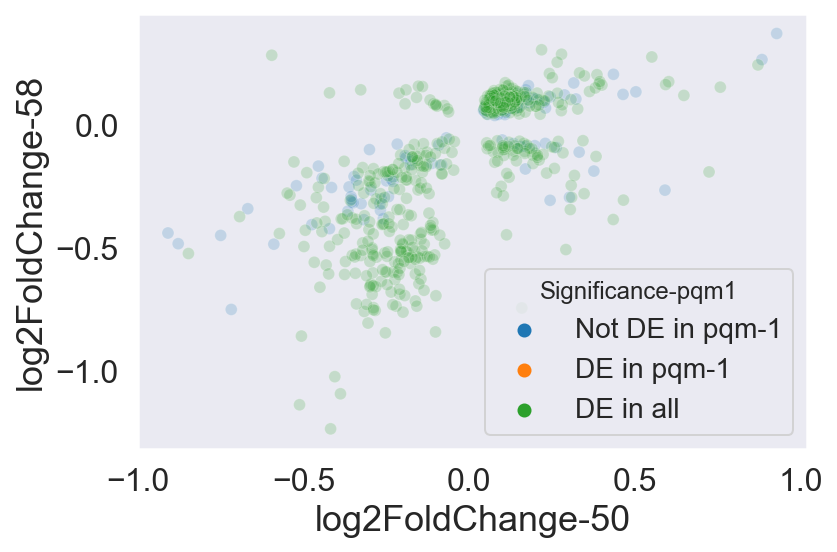

In [31]:
sns.scatterplot('log2FoldChange-50', 'log2FoldChange-58', hue='Significance-pqm1',
                data=res[(res['Significance-WT'] == 'DE in both')], alpha=0.2)#, palette=["black", 'red'])

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

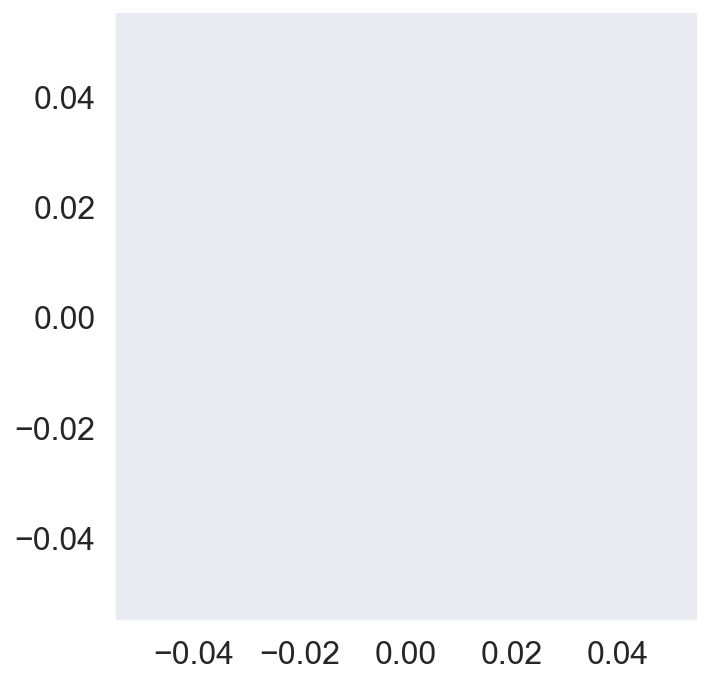

In [82]:
sns.relplot(
    data=res[res.Significance != "Not Sig"].dropna(),
    x="log2FoldChange50", y="log2FoldChange58",
    size='logq58',
    kind="scatter", sizes=(25, 300), hue='Significance',
    palette=['black', 'tab:red'], hue_order=['Same', 'Different'],
    alpha=0.1
)

/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='log2FoldChange50', ylabel='log2FoldChange58'>

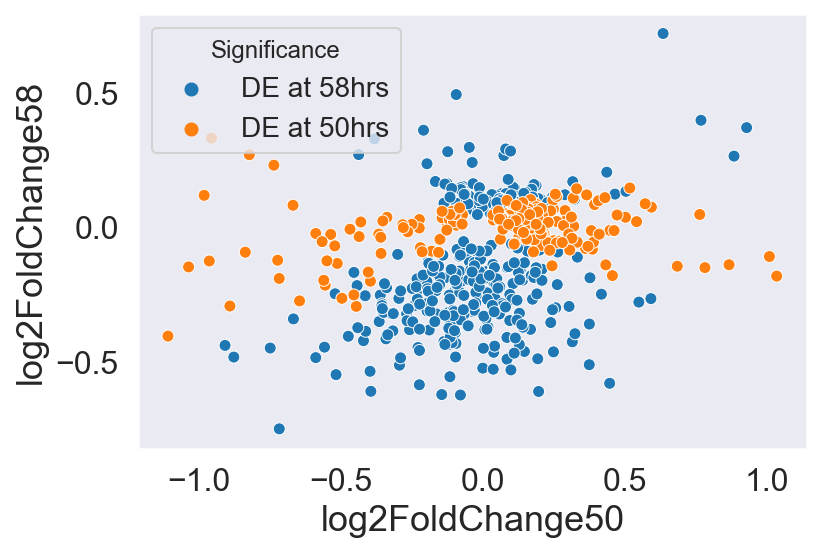

In [65]:
sns.scatterplot('log2FoldChange50', 'log2FoldChange58', hue='Significance',
                data=res[(res.sig < 0.05) & (res.Significance != 'Not Sig')].sort_values('Significance', ascending=False))#, palette=["black", 'red'])

In [28]:
res.columns

Index(['baseMean-50', 'log2FoldChange-50', 'lfcSE-50', 'stat-50', 'pvalue-50',
       'padj-50', 'genename-50', 'neglogq-50', 'baseMean-58',
       'log2FoldChange-58', 'lfcSE-58', 'stat-58', 'pvalue-58', 'padj-58',
       'genename-58', 'neglogq-58', 'baseMean-pqm1', 'log2FoldChange-pqm1',
       'lfcSE-pqm1', 'stat-pqm1', 'pvalue-pqm1', 'padj-pqm1', 'genename-pqm1',
       'neglogq-pqm1', 'externalgenename', 'description', 'chromosome',
       'startposition', 'endposition', 'strand', 'Rank', 'Transcript', 'Gene',
       'Locus', 'AvailableExperiments', 'ExpUp', 'ExpDown', 'VoteScore',
       'tvalue', 'pvalue', 'fdr', 'DBE', 'DAE', 'daf16', 'pqm1', 'Size',
       'Sign-50', 'Sign-58', 'Sign-pqm1', 'Sign-WT', 'Significance-WT',
       'Significance-pqm1', 'Ratio', 'Above', 'MinCountsDetected', 'logBM-50',
       'logBM-58'],
      dtype='object')